In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# REACTION
# C6H1206 -> 3CH4 + 3CO2
# on suppose que C6H12O6 (glucose) est totalement consommé

# entrées
F_G_E = 5000 # mol/h
T_E = 328 # température du glucose d'entrée, 50°C in Kelvin

V_digester = 8000  # m3
T_ambient = 27 + 273.15  # 27°C en Kelvin

# constantes
Delta_H_R_0 = -132 * 10**3 # J/mol

U = 1.5 # W/m²/K béton non isolé

# calculs
F_CH4_S = 3 * F_G_E
F_CO2_S = 3 * F_G_E

r = (V_digester / (2 * np.pi))**(1/3) # rayon digesteur
h = 2 * r  # Hauteur en mètres
A = 2 * np.pi * r * h  # Surface latérale (m²), sans le toit/plancher

def celsius_to_kelvin(T):
    return T + 273.15

def compute_delta_h_r(T):
    # 298 = température de référence
    Delta_H_R_T = Delta_H_R_0 + (T - 298) * (3 * 34.9 + 3 * 50 - 1 * 288.3) # J/mol
    return Delta_H_R_T

def f_q_point_no_rechauffage_no_perte(F_G_E, T_E, T_S):
    #                   réaction à T_E,                      passage des produits à T_S
    q_point =  F_G_E * compute_delta_h_r(T_E) + (T_S - T_E) * (3 * F_G_E * 34.9 + 3 * F_G_E * 50) # J/h
    return q_point/3600 # W

def f_q_point_no_rechauffage(F_G_E, T_E, T_S):
    #          réaction à T_E,                      passage des produits à T_S                      perte de chaleur avec extérieur
    q_point = F_G_E * compute_delta_h_r(T_E) + (T_S - T_E) * (3 * F_G_E * 34.9 + 3 * F_G_E * 50) + U * A * (T_S - T_ambient)  # J/h
    return q_point/3600 # W

def f_q_point_no_perte(F_G_E, T_E, T_S):
    # rechauffage du glucose d'entrée,                réaction à T_E,                      passage des produits à T_S
    q_point =  (T_E - T_ambient) * (F_G_E * 288.3) + F_G_E * compute_delta_h_r(T_E) + (T_S - T_E) * (3 * F_G_E * 34.9 + 3 * F_G_E * 50) # J/h
    return q_point/3600 # W

def f_q_point(F_G_E, T_ambient, T_E, T_S):
    # rechauffage du glucose d'entrée,                réaction à T_E,                      passage des produits à T_S                    
    q_point =  (T_E - T_ambient) * (F_G_E * 288.3) + F_G_E * compute_delta_h_r(T_E) + (T_S - T_E) * (3 * F_G_E * 34.9 + 3 * F_G_E * 50) 
    return q_point/3600 # W

In [13]:
f_q_point(F_G_E=5000, T_ambient=celsius_to_kelvin(27), T_E=celsius_to_kelvin(55), T_S=celsius_to_kelvin(55))

-173511.44414527933

In [97]:
T_S_values = np.linspace(298, 1000, 100)

Q_dot = f_q_point(F_G_E=100, T_E=T_E, T_S=T_S_values)
Q_dot_no_perte = f_q_point_no_perte(F_G_E=100, T_E=T_E, T_S=T_S_values)
Q_dot_no_rechauffage = f_q_point_no_rechauffage_no_perte(F_G_E=100, T_E=T_E, T_S=T_S_values)

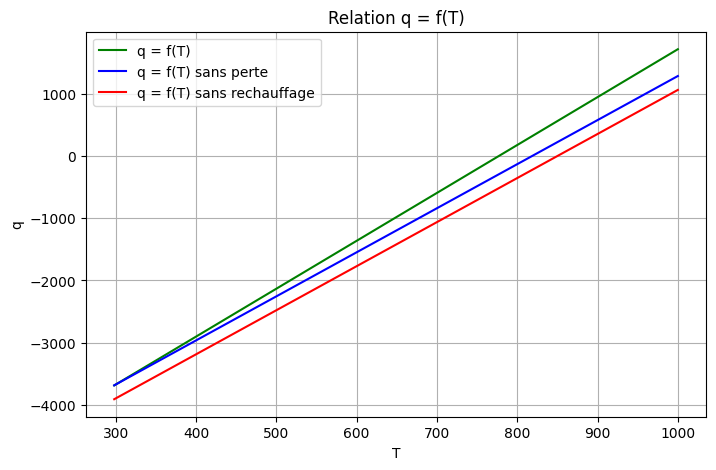

In [98]:
plt.figure(figsize=(8, 5))
plt.plot(T_S_values, Q_dot, label="q = f(T)", color="green")
plt.plot(T_S_values, Q_dot_no_perte, label="q = f(T) sans perte", color="blue")
plt.plot(T_S_values, Q_dot_no_rechauffage, label="q = f(T) sans rechauffage", color="red")
plt.xlabel("T")  # Nom de l'axe des abscisses
plt.ylabel("q")  # Nom de l'axe des ordonnées
plt.title("Relation q = f(T)")
plt.grid(True)
plt.legend()

In [99]:
f_q_point(F_G_E=100, T_E=T_E, T_S=777.215)

-0.0005238457121110211

In [113]:
f_q_point_no_rechauffage(F_G_E=100, T_E=T_E, T_S=806.216)

-0.012305652103968896